<a href="https://colab.research.google.com/github/shivtejshete/Computer-Vision/blob/master/Image_Classification_with_TensorBoard_Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning : Simple DNN to Classify Images, and application of TensorBoard.dev

In [ ]:
#Importing the necessary libraries
import tensorflow as tf
import keras
import tensorflow.keras.datasets.fashion_mnist as data
import numpy as np
from time import time 
import matplotlib.pyplot as plt

###1. Loading Data

In [4]:
#Assigning the raw datafrom Keras dataset - Fashion MNIST
raw_data = data

In [5]:
#Loading the dataset into training and validation dataset
(train_image, train_label), (test_image, test_label) =  raw_data.load_data( )

4423680/4422102 [==============================] - 0s 0us/step


###2. Data Inspection

In [228]:
#checking the input volume shape 
print("Total Training Images :{}".format(train_image.shape[0]))
print("Training Images Shape (ht,wd) :{} X {}".format(train_image.shape[1],train_image.shape[2]))
print("Total Testing Images :{}".format(test_image.shape[0]))
print("Testing Images Shape (ht,wd) :{} X {}".format(test_image.shape[1],test_image.shape[2]))


Total Training Images :60000
Training Images Shape (ht,wd) :28 X 28
Total Testing Images :10000
Testing Images Shape (ht,wd) :28 X 28


###3. Rescaling Data

In [14]:
#rescaling the images for better training of Neural Network
train_image = train_image/255.0  
test_image = test_image/255.0

In [233]:
#Existing Image classes from Fashion MNIST - in original Order
class_labels= ['T-shirt/top',
          'Trouser',
          'Pullover',
          'Dress',
          'Coat',
          'Sandal',
          'Shirt',
          'Sneaker',
          'Bag',
          'Ankle boot']

###4. Sample Images Visualization

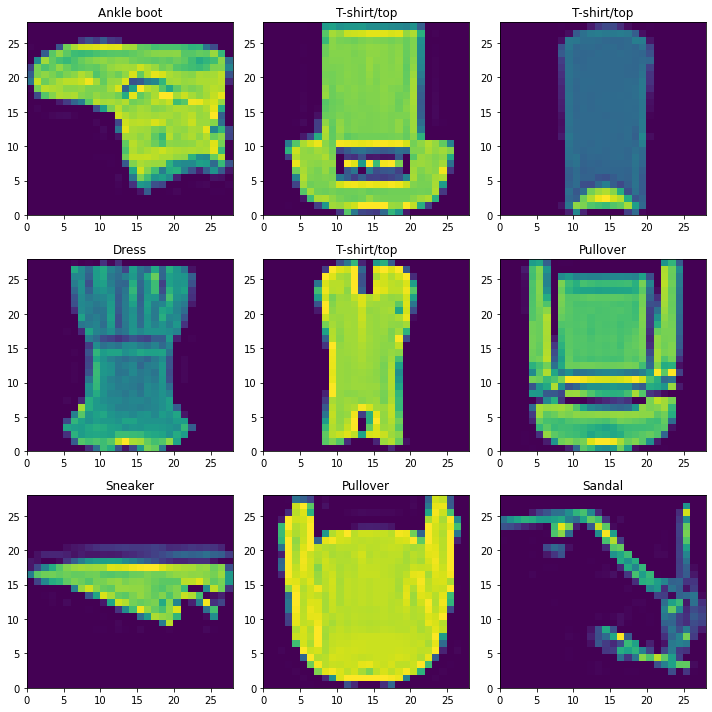

In [234]:
#Visualizing some of the training images

fig, ax= plt.subplots(3,3, figsize=(10,10) )
for i,img in enumerate(ax.flatten()):
  img.pcolor(train_image[i])
  img.set_title(class_labels[train_label[i]])
plt.tight_layout()

###5. Building the Model Architecture

In [193]:
#Defining a very Simple Deep Neural Network with Softmax as activation function of the top layer for multi-class classification
model = keras.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation= 'relu', use_bias= True))
model.add(keras.layers.Dropout(rate= .2))
model.add(keras.layers.Dense(64, activation='relu', use_bias=True))
model.add(keras.layers.Dropout(rate= .2))
model.add(keras.layers.Dense(10, activation='softmax' ))

###6. Defining TensorBoard for Training visualization

In [195]:
#creating a tensorboard object to be called while training the model
tensorboard = keras.callbacks.TensorBoard(log_dir='.../logs', histogram_freq=1, batch_size=1000, write_grads=True, write_images=True )

/usr/local/lib/python3.6/dist-packages/keras/callbacks/tensorboard_v2.py:92: UserWarning: The TensorBoard callback `batch_size` argument (for histogram computation) is deprecated with TensorFlow 2.0. It will be ignored.
  warnings.warn('The TensorBoard callback `batch_size` argument '
/usr/local/lib/python3.6/dist-packages/keras/callbacks/tensorboard_v2.py:97: UserWarning: The TensorBoard callback does not support gradients display when using TensorFlow 2.0. The `write_grads` argument is ignored.
  warnings.warn('The TensorBoard callback does not support '


###7. Model Training

In [194]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics= ['accuracy'])

In [196]:
# Fitting the model with tensorboard object as callbacks
model.fit(train_image, train_label, batch_size=1000, epochs = 24, validation_data=(test_image, test_label), callbacks=[tensorboard] )

Train on 60000 samples, validate on 10000 samples
Epoch 1/24
60000/60000 [==============================] - 2s 37us/step - loss: 0.8993 - accuracy: 0.6824 - val_loss: 0.5451 - val_accuracy: 0.8151
Epoch 2/24
60000/60000 [==============================] - 2s 27us/step - loss: 0.5324 - accuracy: 0.8156 - val_loss: 0.4557 - val_accuracy: 0.8432
Epoch 3/24
60000/60000 [==============================] - 2s 26us/step - loss: 0.4532 - accuracy: 0.8406 - val_loss: 0.4259 - val_accuracy: 0.8447
Epoch 4/24
60000/60000 [==============================] - 2s 28us/step - loss: 0.4132 - accuracy: 0.8542 - val_loss: 0.3961 - val_accuracy: 0.8590
Epoch 5/24
60000/60000 [==============================] - 2s 28us/step - loss: 0.3872 - accuracy: 0.8636 - val_loss: 0.3810 - val_accuracy: 0.8628
Epoch 6/24
60000/60000 [==============================] - 2s 27us/step - loss: 0.3673 - accuracy: 0.8701 - val_loss: 0.3669 - val_accuracy: 0.8680
Epoch 7/24
60000/60000 [==============================] - 2s 28us/st

In [230]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
________________________________________________

###8. Uploading the logs to TensorBoard.dev

In [249]:
# #checking out the TensorBoard dashboard to analyze training and validation performance with other statistics during the training of model
%reload_ext tensorboard
!tensorboard dev upload --logdir '.../logs' --name "Deep Learning : Tensorboard" --description "Modeling a very simple Image Classifier based on Fashion MNIST dataset " 

Live Link : https://tensorboard.dev/experiment/u6hGU2LaQqKn1b1udgL1RA/

###9. Making a Sample Prediction

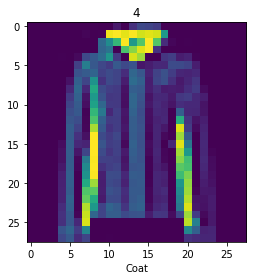

In [237]:
#selection of an image
sample = test_image[6]
plt.imshow(sample)
plt.xlabel(class_labels[test_label[6]])
plt.title(test_label[6])
plt.tight_layout()

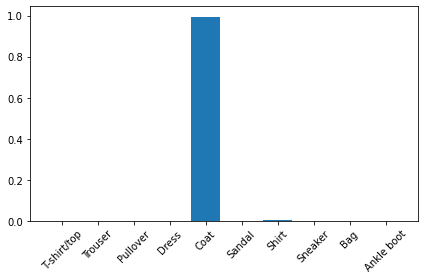

In [248]:
#Prediction using trained model
results= model.predict(test_image[6].reshape(1,28,28))
plt.bar(np.arange(0,10),results[0], tick_label=class_labels, )
plt.xticks(rotation=45)
plt.tight_layout()

###Summary
1. This Simple Deep learning Model performance shows it achieved an accuracy of 91% at the end of 24th Epochs, and validation accuracy of 89%.
2. The divergence between the accuracies or loss function values indicates a potential overfitting. Model can be generalized using other regularization methodologies such as weight regularization, bias regularization, dropout and others.
3. TensorBoard offered us high understanding of online-training performance and more details in the form of Graphs, Histograms and Distributions.